In [1]:
'''
Baseado em exemplos disponíveis em:
https://github.com/keras-team/keras/blob/master/examples/
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import pandas as pd
import numpy as np
import seaborn as sns

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 31s 521us/step - loss: 0.0669 - accuracy: 0.9811 - val_loss: 0.0366 - val_accuracy: 0.9869
Test loss: 0.03663188062669942
Test accuracy: 0.9868999719619751


In [7]:
import matplotlib.pyplot as plt

def plot_loss_acc(history, ylim = 0.2):
    # acc = history.history['acc']
    # val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    # plt.plot(epochs, acc, 'bo', label='Training acc')
    # plt.plot(epochs, val_acc, 'b', label='Validation acc')
    # plt.title('Training and validation accuracy')
    # plt.legend()

    # plt.figure()
    
    plt.ylim((0, ylim))

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_loss_acc(history)

In [8]:
# salvando o modelo treinado
model.save('modelo_treinado.h5')

# Carregando modelo e fazendo predição

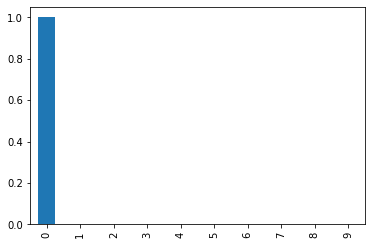

In [14]:
# carregando o modelo treinado

model_load = load_model('modelo_treinado.h5')
ii_test = 10
pred = model_load.predict(np.expand_dims(x_test[ii_test], axis = 0))
pd.Series(pred[0]).plot(kind = 'bar')

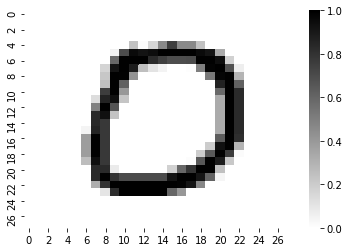

In [17]:
sns.heatmap(x_test[ii_test].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)